# Generate Figure 5 for surround-size project.  
###Finds the infomax filter fit to each individual ganglion cell.

In [25]:
import numpy as np
from scipy.stats import sem

# import my functions
import info_theory_functions as info
from lnl_model_functions import *
from atick_redlich_functions import *
from get_davids_data import *
from image_processing_functions import *

# from scipy.optimize import minimize
# from scipy import fft, arange
# from random import randint
# from cmath import polar
# from numpy.fft import fft2
# from numpy.fft import fftshift
# from sklearn.decomposition import PCA
# from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import sem


# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
from matplotlib.pyplot import *

# note that nonposx(y) for log plots will no longer work with this package
# I recommend against enabling the whole notebook, since some plots come out funny.
# Instead, just use mpld3.display() at the end of cells you want to interact with.
import mpld3
#mpld3.enable_notebook()

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import natural images

In [26]:
# choose an image path from cd13A (flood plain, water, horizon) or cd01A (baboons, trees, bushes)
im_path     = '/Users/lmcintosh/Documents/Natural_Images/RawData/cd13A' # flood plain, water, horizon
num_images  = 100
patch_size  = None
pixelsToDeg = 92./2 # or 2./92 degrees per pixel (spacing)
spacing     = 1./pixelsToDeg # number of degree spacing between pixels
normalize   = 'divisive'
contrast    = 0.35
patches     = load_images(im_path, num_images, patch_size, square=True, 
                          normalize=normalize, effective_contrast=contrast)

Only 78 files in directory.


In [27]:
allRot  = [spectrum2d(p,spacing=spacing,frequencyFlag=False) for p in patches]
specRot = mean(allRot, axis=0) # average out the amplitude spectrum over all images
frqRot, tmp = spectrum2d(patches[0],spacing=spacing,frequencyFlag=True)
error = [sem([allRot[j][i] for j in range(len(patches))]) for i in range(len(frqRot))]
originalSpectra = specRot
originalErrors  = error
originalFreqs   = frqRot

# Refer to fig5_each_cell() in atick_redlich_functions.py

(0.099999842260711833, 0.39999867928132615)
The relative error from this choice of Lagrangian multiplier is 2.12073232765e-07.
(0.18944793982956507, 0.082126567671193793)
The relative error from this choice of Lagrangian multiplier is 4.68643211532e-09.
(0.099999999302835013, 0.40000000358866961)
The relative error from this choice of Lagrangian multiplier is 5.83409126098e-07.
(-0.17407211245763135, 0.24930984813768353)
The relative error from this choice of Lagrangian multiplier is 1.32751948816e-08.
(0.21255790281090439, 0.087050385392934956)
The relative error from this choice of Lagrangian multiplier is 2.6771409767e-09.
(0.7443882706748185, 1.1699324452016913)
The relative error from this choice of Lagrangian multiplier is 3.73218266951e-08.
(0.10000000000000001, 0.40000000000000002)
The relative error from this choice of Lagrangian multiplier is 1.82510344208e-07.
(0.099999991888384723, 0.40000002460425754)
The relative error from this choice of Lagrangian multiplier is 5.301815

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

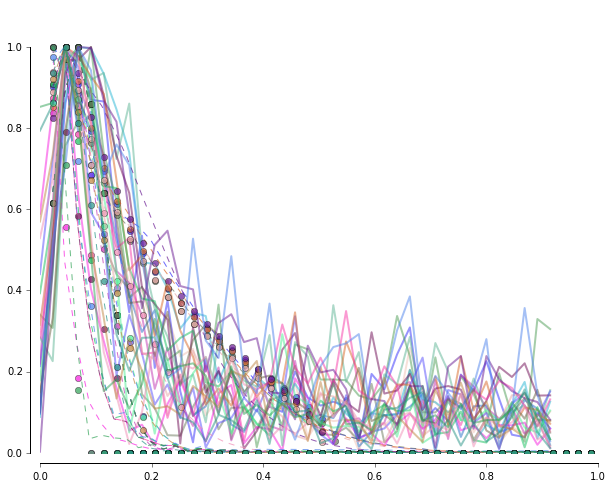

In [95]:
fig5_each_cell(originalFreqs, originalSpectra**2, 6)